<a href="https://colab.research.google.com/github/pedro-hnrq/House-Price/blob/first-module/house_prices_1module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Prices Advanced Regression Techniques


---


(Preços de Casas )

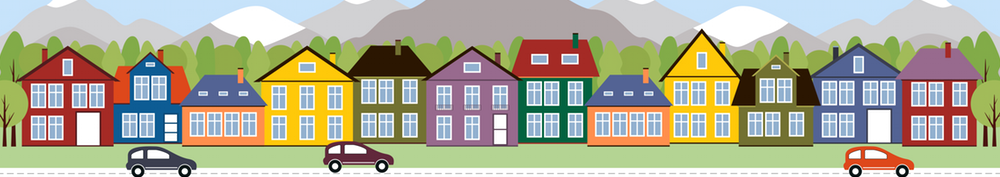

Disponível: [Preços de Casas](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)






## **1° Parte** - Primeiro modelo

In [1]:
import pandas as pd

In [2]:
training = pd.read_csv("/content/drive/MyDrive/house-prices-advanced-regression-techniques/train.csv")

In [3]:
display(training)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
training.shape

(1460, 81)

In [5]:
# Informações
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Valores Vazios
(training.isnull().sum()/training.shape[0]).sort_values(ascending=False).head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Id              0.000000
dtype: float64

In [7]:
# Eliminar as colunas com mais de 10% de valores vazios
elimenate = training.columns[training.isnull().sum()/training.shape[0] > 0.1]
elimenate

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [8]:
# Eliminando essas colunas
training = training.drop(elimenate, axis=1)

In [9]:
# Retirando os valores vazios
training = training.fillna(-1)

In [10]:
training.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [11]:
# Selecionando apenas as colunas numéricas
col_nr = training.columns[training.dtypes != 'object']
col_nr

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [12]:
# E criar uma nova base com esses valores
treino = training.loc[:,col_nr]

### Criando o modelo



*  Separar em treino e teste
  *   https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html







In [13]:
X = treino.drop('SalePrice', axis=1)
y = treino.SalePrice

In [14]:
# Importanto o train_test_split
from sklearn.model_selection import train_test_split

In [15]:
# Separando essa base em treino e teste
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

### Algoritmos



*   [Regressão Linear](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
*   [Árvore de Regressão](https://scikit-learn.org/stable/modules/tree.html#regression)
*   [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn-neighbors-kneighborsregressor)



In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_rl = LinearRegression().fit(X_train, y_train)

In [18]:
# Fazendo a previssão pros dados de teste
y_pred_rl = reg_rl.predict(X_test)


In [19]:
from sklearn import tree

In [20]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_ad = tree.DecisionTreeRegressor().fit(X_train, y_train)


In [21]:
# Fazendo a previsão
y_pred_ad = reg_ad.predict(X_test)

In [22]:
from sklearn.neighbors import KNeighborsRegressor

In [23]:
reg_knn = KNeighborsRegressor(n_neighbors=2).fit(X_train, y_train)

In [24]:
y_pred_knn = reg_knn.predict(X_test)

### Tanta o erro absoluto quanto o quadrático:



*   [Erro médio absoluto](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)
*   [Erro quadrático médio](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)



In [25]:
from sklearn.metrics import mean_absolute_error

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
print(mean_absolute_error(y_test, y_pred_rl))
print(mean_squared_error(y_test, y_pred_rl))

23763.187393064683
1533982883.4449246


In [28]:
print(mean_absolute_error(y_test, y_pred_ad))
print(mean_squared_error(y_test, y_pred_ad))

27064.88589211618
1859932620.9813278


In [29]:
print(mean_absolute_error(y_test, y_pred_knn))
print(mean_squared_error(y_test, y_pred_knn))

33273.08298755187
2733937586.841286


### Visualização y_test as previsões feitas



[Matplotlib](https://matplotlib.org)



In [30]:
import matplotlib.pyplot as plt

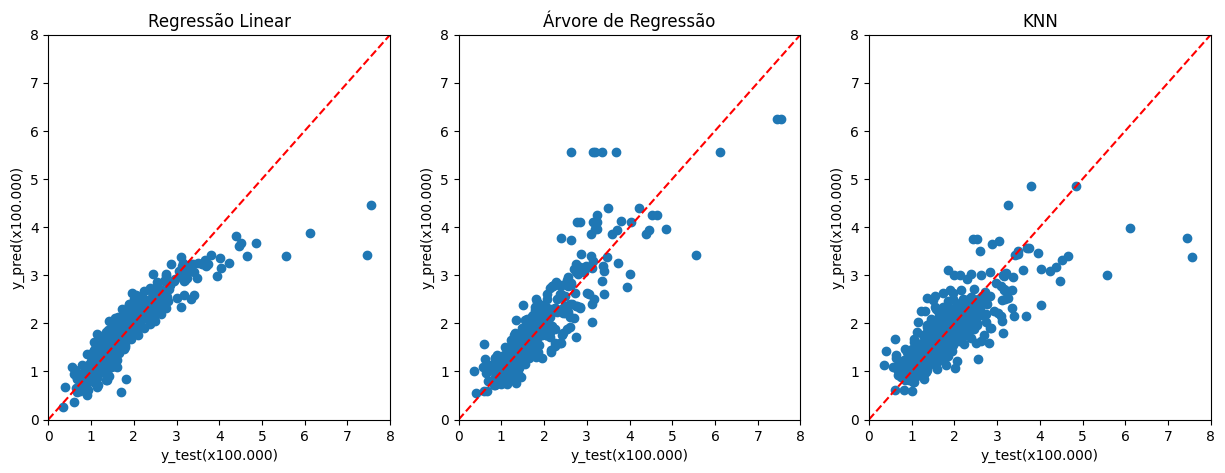

In [31]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))

ax[0].scatter(y_test/100000, y_pred_rl/100000)
ax[0].plot([0, 8], [0, 8], '--r')
ax[1].scatter(y_test/100000, y_pred_ad/100000)
ax[1].plot([0, 8], [0, 8], '--r')
ax[2].scatter(y_test/100000, y_pred_knn/100000)
ax[2].plot([0, 8], [0, 8], '--r')

# ax[0].set(xlim=(0, 800000), ylim=(0, 800000))

ax[0].set(xlim=(0, 8), ylim=(0, 8))
ax[0].set_xlabel('y_test(x100.000)')
ax[0].set_ylabel('y_pred(x100.000)')
ax[0].set_title('Regressão Linear')

ax[1].set(xlim=(0, 8), ylim=(0, 8))
ax[1].set_xlabel('y_test(x100.000)')
ax[1].set_ylabel('y_pred(x100.000)')
ax[1].set_title('Árvore de Regressão')

ax[2].set(xlim=(0, 8), ylim=(0, 8))
ax[2].set_xlabel('y_test(x100.000)')
ax[2].set_ylabel('y_pred(x100.000)')
ax[2].set_title('KNN')

plt.show()

### Fazendo a previsão para a **base de teste**



*   **Obs.:** não excluir linhas



In [32]:
test = pd.read_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/test.csv')

In [33]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [34]:
test = test.drop(elimenate, axis=1)

In [35]:
col_nr_test = test.columns[test.dtypes != 'object']
col_nr_test

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [36]:
test = test.loc[:,col_nr_test]

In [37]:
display(test)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,1936,4,7,1970,1970,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,6,2006
1455,2916,160,1894,4,5,1970,1970,0.0,252.0,0.0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,2917,20,20000,5,7,1960,1996,0.0,1224.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,2918,85,10441,5,5,1992,1992,0.0,337.0,0.0,...,0.0,80,32,0,0,0,0,700,7,2006


In [38]:
test.isnull().sum().sort_values(ascending=False).head(12)

GarageYrBlt     78
MasVnrArea      15
BsmtHalfBath     2
BsmtFullBath     2
BsmtUnfSF        1
GarageCars       1
GarageArea       1
BsmtFinSF1       1
BsmtFinSF2       1
TotalBsmtSF      1
OpenPorchSF      0
WoodDeckSF       0
dtype: int64

In [39]:
# Trocando todos os valores vazios por -1
test = test.fillna(-1)

In [40]:
test.isnull().sum().sort_values(ascending=False).head(3)

Id              0
MSSubClass      0
BedroomAbvGr    0
dtype: int64

In [41]:
y_pred = reg_rl.predict(test)

In [42]:
# Podemos adicionar essa coluna de previsão
test['SalePrice'] = y_pred

In [43]:
# Extrair somente o ID e o SalePrice
base_kaggle = test[['Id','SalePrice']]
base_kaggle.head(3)

,Id,SalePrice
0,1461,122234.995960
1,1462,139178.263684
2,1463,169872.054251


In [44]:
base_kaggle.to_csv("/content/drive/MyDrive/house-prices-advanced-regression-techniques/resultado1.csv", index=False)